In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
climate = pd.read_csv('climate.csv', sep='\t')
deliveries = pd.read_csv('deliveries.csv', sep='\t')
yields = pd.read_csv('yields.csv', sep='\t')

In [3]:
climate.head()

,pblk,day,ddays50,ddays50_97,ddays97,precip_intensity,precip_intensity_adj,meantemp,mintemp,mintemp_time,...,sunset_temp,dew_point,wind_speed,wind_bearing,pressure,cloud_cover,lat,long,region,region_consolidated
0,100013,2011-01-24 00:00:00,0.42,0.42,0.00,0.0092,0.0092,44.19,38.24,2011-01-24 02:00:00,...,50.47,42.68,0.55,223,1021.41,0.62,2580.4751,-8409.4591,MADERA,FRES
1,100013,2011-12-19 00:00:00,0.41,0.41,0.00,0.0000,0.0000,40.13,32.65,2011-12-19 04:00:00,...,49.12,35.74,0.68,95,1018.84,0.20,2580.4751,-8409.4591,MADERA,FRES
2,100013,2003-09-13 01:00:00,29.66,25.66,0.09,0.0000,0.0000,79.66,64.10,2003-09-13 08:00:00,...,83.27,52.19,4.08,308,1008.79,0.02,2580.4751,-8409.4591,MADERA,FRES
3,100013,1998-04-14 01:00:00,2.26,2.26,0.00,0.0000,0.0000,49.25,39.70,1998-04-14 08:00:00,...,52.91,39.22,5.48,301,1016.50,0.52,2580.4751,-8409.4591,MADERA,FRES
4,100013,1999-01-29 00:00:00,0.81,0.81,0.00,0.0000,0.0000,42.13,30.46,1999-01-29 07:00:00,...,50.17,36.86,3.25,122,1023.78,0.10,2580.4751,-8409.4591,MADERA,FRES


In [4]:
deliveries.head()

,weighttagno,tagyear,siteno,programno,crushdate,brix,tons,pblk
0,792954,1,8,GTV177CAL,08/08/01,20.400000,1.8459,111735
1,792963,1,8,GTV177CAL,08/08/01,20.200001,1.7955,111735
2,792967,1,8,GTV177CAL,08/08/01,19.700001,1.7752,111735
3,792972,1,8,GTV177CAL,08/08/01,19.900000,1.8914,111735
4,792980,1,8,GTV177CAL,08/08/01,19.600000,1.7395,111735


In [5]:
yields.head()

,pblk,crop_year,tons,acres
0,100013,2000,28.0987,2.8000
1,100013,2001,24.8185,2.8000
2,100013,2002,27.7305,2.8000
3,100013,2003,25.5024,2.7993
4,100013,2004,19.7302,2.8000


In [6]:
climate['pblk'].unique().shape

(803,)

In [7]:
climate.columns

Index(['pblk', 'day', 'ddays50', 'ddays50_97', 'ddays97', 'precip_intensity',
       'precip_intensity_adj', 'meantemp', 'mintemp', 'mintemp_time',
       'maxtemp', 'maxtemp_time', 'humidity', 'sunrise_time', 'sunrise_temp',
       'sunset_time', 'sunset_temp', 'dew_point', 'wind_speed', 'wind_bearing',
       'pressure', 'cloud_cover', 'lat', 'long', 'region',
       'region_consolidated'],
      dtype='object')

In [8]:
deliveries['programno'].unique()

array(['GTV177CAL ', 'EJG101CAL ', 'TLV101CAL ', 'TLV005CAL ',
       'SVL101CAL ', 'CHP101CAL ', 'TLV178CAL ', 'GTV178CAL ',
       'BAL104CAL ', 'EJG101CALS', 'GTV005CAL ', 'RWC005CAL ',
       'TLV006CAL ', 'GLC101CAL ', 'SVL010CAL ', 'SVL176CAL ',
       'GBV005CAL ', 'CHP100CAL ', 'RWC101CAL ', 'GBV005CALS',
       'TLV002CAL ', 'GBV005CALN', 'GBV101CAL ', 'TLV009CAL ',
       'BWS009CAL ', 'DMT961CAL ', 'BWS103SVL ', 'SVL103CAL ',
       'SVL002CAL ', 'GBD504CAL ', 'MPC004CAL ', 'GTV002CAL ',
       'RWC002CAL ', 'BWA002CAL ', 'GLC312CAL ', 'BWD103SVL ',
       'CNC504CAL ', 'GLC002CAL ', 'TLR002SON ', 'GLC178CAL ',
       'GLC005CAL ', 'TLV101CALN', 'SVL005CAL ', 'GTV005CALK',
       'GTV005CALF', 'GTV005CALS', 'GTV005CALN', 'GWN005PRB ',
       'DBL010CAL ', 'GBD206CAL ', 'GLC005CALR', 'GLC005CALD',
       'PRS101CAL ', 'GEN005CAL ', 'GLC005CALT', 'GSC005SON ',
       'GEN009CAL ', 'WVN406CAL ', 'LME005MMR ', 'GTV009CALN',
       'GLC005CALF', 'RWC009CAL ', 'VAL009CAL ', 'GWN00

In [9]:
deliveries.describe()

,weighttagno,tagyear,siteno,brix,tons,pblk
count,194275.000000,194275.000000,194275.000000,194275.000000,194275.000000,194275.000000
mean,378556.110905,8.373383,5.274513,23.138915,1.671112,117453.354719
std,265133.039422,3.905082,2.987422,2.298887,0.187526,11694.808470
min,100003.000000,1.000000,2.000000,0.000000,0.071400,100013.000000
25%,178114.000000,5.000000,2.000000,21.500000,1.607200,110012.000000
50%,286709.000000,9.000000,8.000000,23.600000,1.693300,114593.000000
75%,423017.500000,12.000000,8.000000,24.799999,1.769600,129761.000000
max,909777.000000,14.000000,8.000000,35.200001,2.739100,142097.000000


In [10]:
deliveries[deliveries['brix'] == 0].shape

(14, 8)

In [11]:
deliveries.columns

Index(['weighttagno', 'tagyear', 'siteno', 'programno', 'crushdate', 'brix',
       'tons', 'pblk'],
      dtype='object')

In [12]:
deliveries['tagyear'] = deliveries['tagyear'].astype('object')
deliveries['siteno'] = deliveries['siteno'].astype('object')
deliveries['pblk'] = deliveries['pblk'].astype('object')

In [13]:
deliveries['tagyear'].describe()

count     194275
unique        14
top            9
freq       19076
Name: tagyear, dtype: int64

In [14]:
deliveries['siteno'].describe()

count     194275
unique         2
top            8
freq      106026
Name: siteno, dtype: int64

In [15]:
deliveries['pblk'].describe()

count     194275
unique       803
top       102411
freq        3438
Name: pblk, dtype: int64

# weighttagno: delivery load id

In [16]:
deliveries['weighttagno'] = deliveries['weighttagno'].astype('str')
deliveries['weighttagno'].describe()

count     194275
unique    182474
top       146666
freq           2
Name: weighttagno, dtype: object

In [45]:
deliveries[deliveries['weighttagno'] == '146666'].head()

,weighttagno,tagyear,siteno,programno,crushdate,brix,tons,pblk,tier,varietal,origin,year,month,day
59660,146666,9,8,VAL005CAL,2009-10-16,23.9,1.73740,133491,VAL,5,CAL,2009,10,16
118737,146666,3,2,JCE206CAL,2003-10-29,25.9,1.72795,113303,JCE,206,CAL,2003,10,29


WEIRD!!!!!

# tagyear: year of delivery

In [18]:
deliveries['tagyear'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype=object)

# siteno: site load delivered to

In [19]:
deliveries['siteno'].describe()

count     194275
unique         2
top            8
freq      106026
Name: siteno, dtype: int64

# brix

In [20]:
deliveries['brix'].describe()

count    194275.000000
mean         23.138915
std           2.298887
min           0.000000
25%          21.500000
50%          23.600000
75%          24.799999
max          35.200001
Name: brix, dtype: float64

In [21]:
brix0 = deliveries[deliveries['brix'] == 0]
print(brix0.shape)
brix0

(14, 8)


,weighttagno,tagyear,siteno,programno,crushdate,brix,tons,pblk
1278,797639,1,8,EJG101CAL,08/23/01,0.0,0.7322,101643
1289,798024,1,8,RWC005CAL,08/24/01,0.0,1.4042,114401
11603,823709,2,8,TLV002CALH,10/23/02,0.0,1.8641,114595
12851,829176,3,8,GLC101CAL,09/06/03,0.0,1.5722,101669
18550,843315,4,8,FRU101LOD,08/11/04,0.0,1.4819,102498
18594,843421,4,8,EJG101CAL,08/12/04,0.0,1.6506,100839
18907,844298,4,8,GLC101CAL,08/14/04,0.0,1.8277,101636
29360,872306,5,8,GLC005CAL,10/22/05,0.0,1.8697,101662
30201,873672,5,8,GLC005CAL,10/28/05,0.0,1.5176,117027
32021,882238,6,8,VAL101CAL,09/07/06,0.0,1.8319,101626


# tons: tons of delivered load

In [22]:
deliveries['tons'].describe()

count    194275.000000
mean          1.671112
std           0.187526
min           0.071400
25%           1.607200
50%           1.693300
75%           1.769600
max           2.739100
Name: tons, dtype: float64

# pblk: vineyard id

In [23]:
deliveries['pblk'].describe()

count     194275
unique       803
top       102411
freq        3438
Name: pblk, dtype: int64

# programno: wine type ( TTTVVVLLL) TTT - tier, VVV - varietal, LLL - origin

In [24]:
deliveries['programno'] = deliveries['programno'].astype('str')
deliveries['programno'].describe()

count         194275
unique           284
top       JCE201CAL 
freq           26346
Name: programno, dtype: object

In [25]:
deliveries['tier'] = deliveries['programno'].apply(lambda x: x[:3])
deliveries['varietal'] = deliveries['programno'].apply(lambda x: x[3:6])
deliveries['origin'] = deliveries['programno'].apply(lambda x: x[6:])
print(deliveries['tier'].describe())
print(deliveries['varietal'].describe())
print(deliveries['origin'].describe())

count     194275
unique        81
top          JCE
freq       29594
Name: tier, dtype: object
count     194275
unique        50
top          101
freq       42122
Name: varietal, dtype: object
count     194275
unique        29
top         CAL 
freq      141899
Name: origin, dtype: object


In [26]:
varietal = deliveries['varietal'].unique()
varietal

array(['177', '101', '005', '178', '104', '006', '010', '176', '100',
       '002', '009', '961', '103', '504', '004', '312', '206', '406',
       '290', '106', '323', '201', '030', '107', '327', '341', '011',
       '050', '308', '008', '033', '032', '326', '200', '118', '001',
       '116', '048', '026', '105', '044', '337', '320', '319', '102',
       '325', '339', '180', '303', '485'], dtype=object)

In [27]:
deliveries['varietal'] = deliveries['varietal'].astype(int)

# crushdate: date of delivery

In [28]:
deliveries['crushdate'] = pd.to_datetime(deliveries['crushdate'], infer_datetime_format=True)

In [29]:
deliveries['crushdate'].describe()

count                  194275
unique                    986
top       2010-10-28 00:00:00
freq                      454
first     2001-08-08 00:00:00
last      2014-10-30 00:00:00
Name: crushdate, dtype: object

In [30]:
deliveries['year'] = deliveries['crushdate'].apply(lambda x: x.year).astype(int)
deliveries['month'] = deliveries['crushdate'].apply(lambda x: x.month).astype(int)
deliveries['day'] = deliveries['crushdate'].apply(lambda x: x.day).astype(int)

In [31]:
deliveries['month'].describe()

count    194275.000000
mean          9.293584
std           0.732184
min           7.000000
25%           9.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: month, dtype: float64

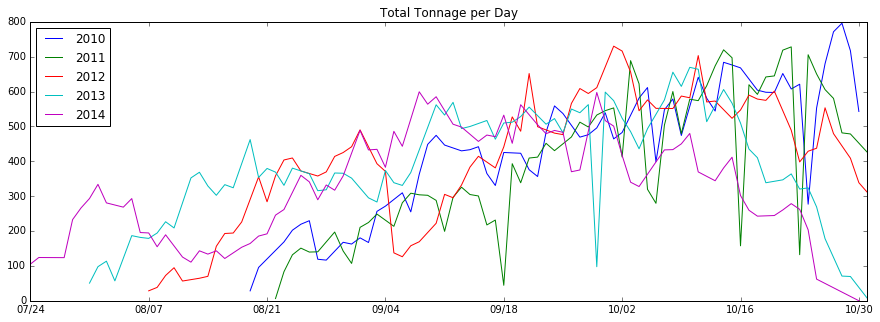

In [47]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15,5))
#data = deliveries[deliveries['varietal'] == 101]
#data = deliveries[deliveries['pblk'] == 102411]
#groups = data.groupby(['year'])
groups = deliveries.groupby(['year'])
for key, df in groups:
    tons_per_day = pd.DataFrame(columns=['date', 'tons'])
    g = df.groupby(['month', 'day'])
    i = 0
    for k, d in g:
        tons_per_day.loc[i] = [pd.to_datetime(str(k[0]) + '/' + str(k[1]), format='%m/%d'), d['tons'].sum()]
        i += 1
    if key >= 2010:
        plt.plot(tons_per_day['date'], tons_per_day['tons'], label=key)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.legend(loc='upper left')
plt.title('Total Tonnage per Day')
plt.show()

In [33]:
deliveries[(deliveries['year'] == 2014) & (deliveries['month'] == 8)]['tons'].sum()

5889.537150000004

In [34]:
deliveries[(deliveries['year'] == 2011) & (deliveries['month'] == 8)]['tons'].sum()

1100.0601500000002

In [35]:
deliveries[deliveries['pblk'] == 102411]['varietal'].describe()

count    3438.000000
mean      213.013962
std       180.516434
min        50.000000
25%       103.000000
50%       103.000000
75%       504.000000
max       504.000000
Name: varietal, dtype: float64

# More on brix

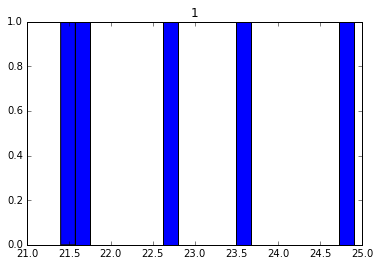

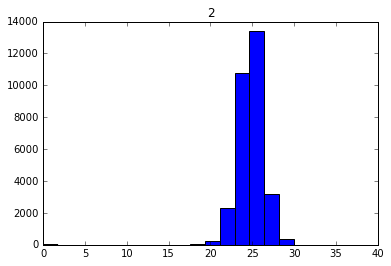

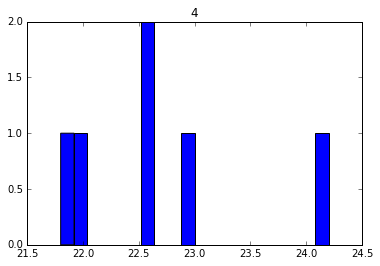

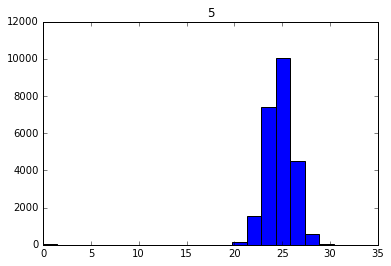

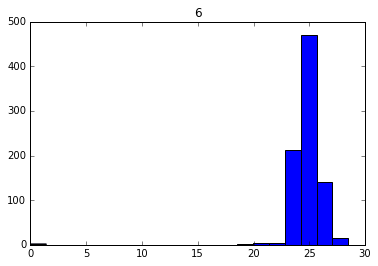

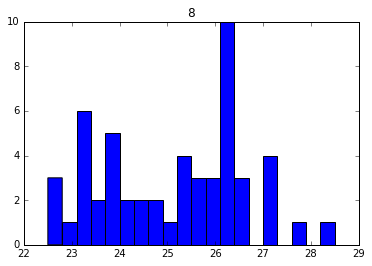

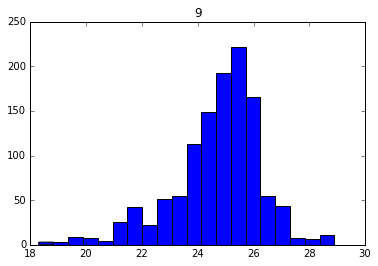

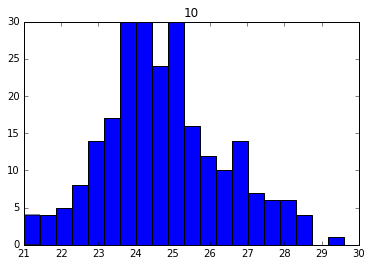

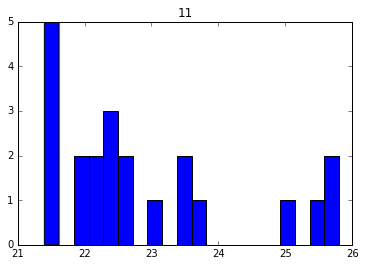

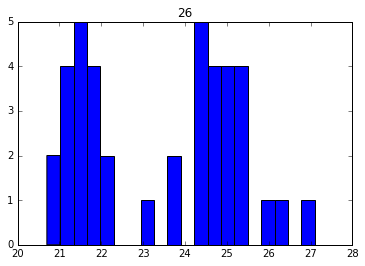

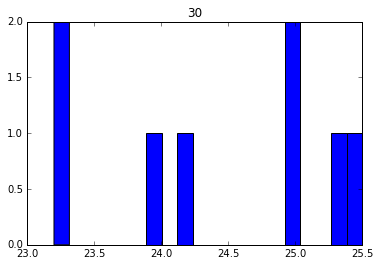

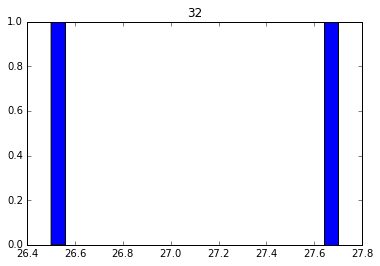

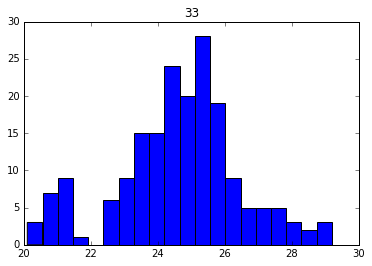

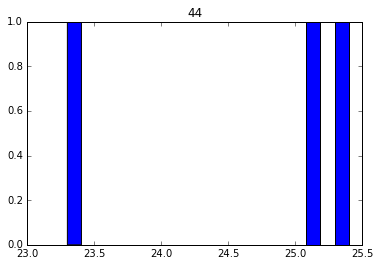

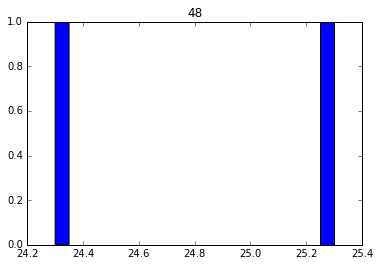

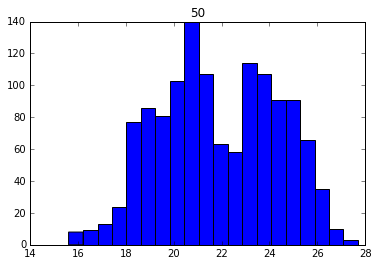

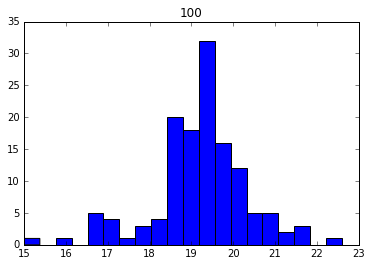

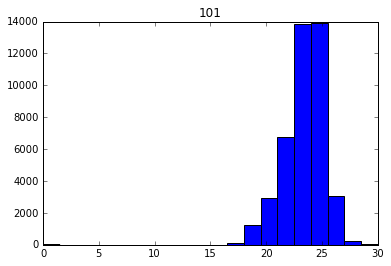

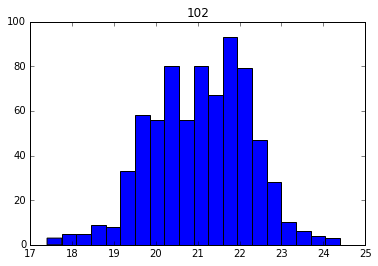

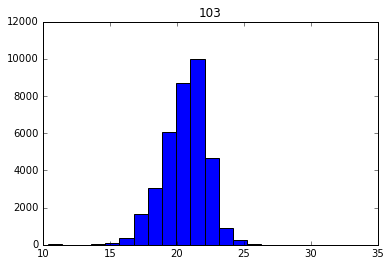

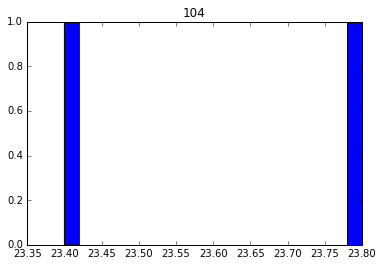

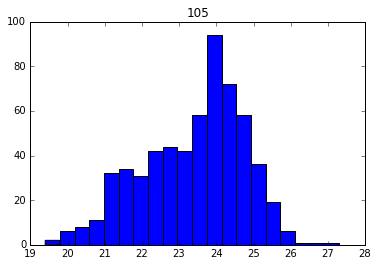

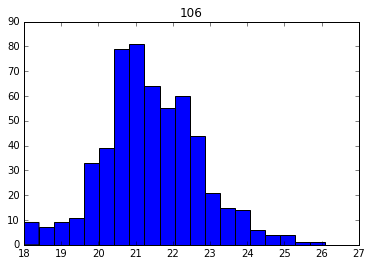

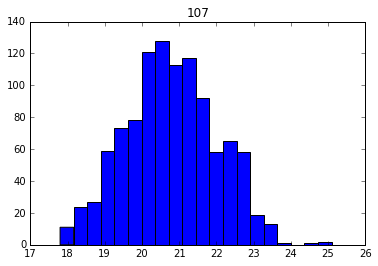

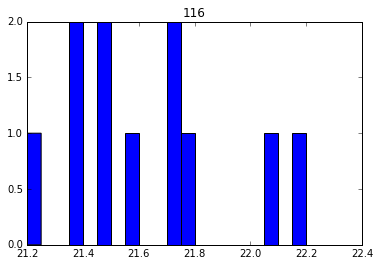

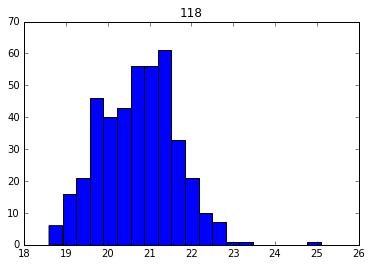

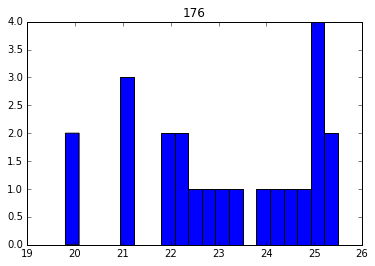

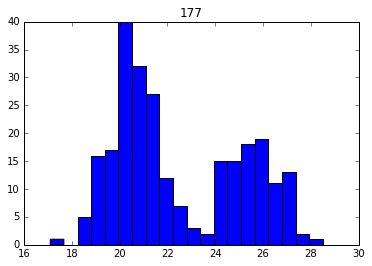

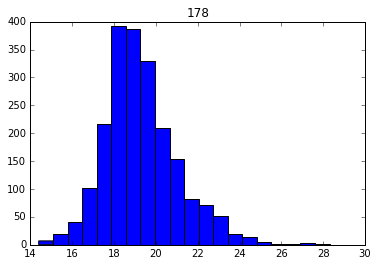

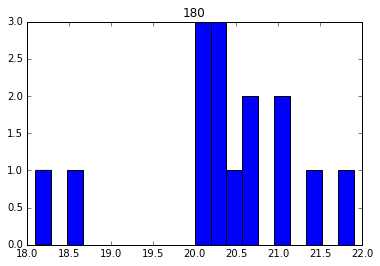

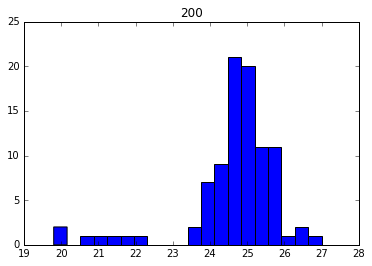

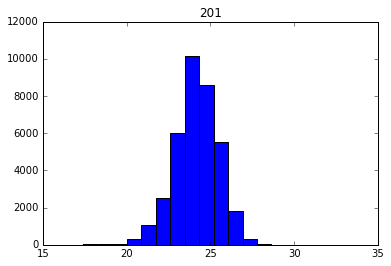

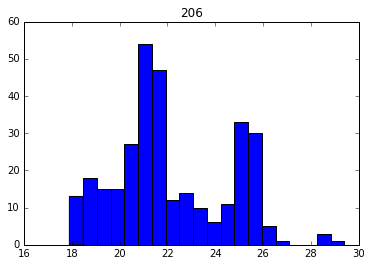

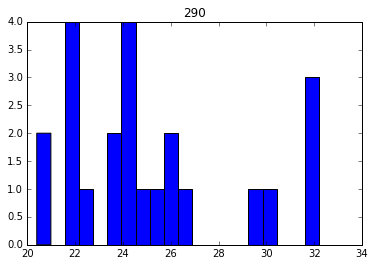

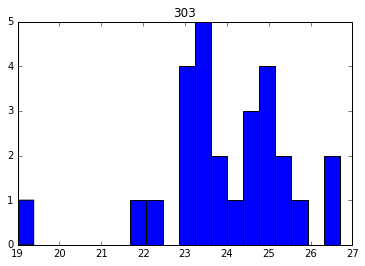

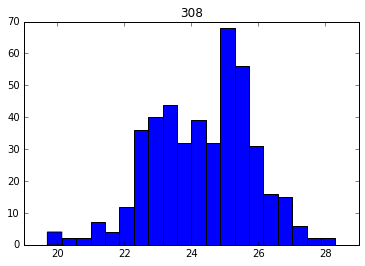

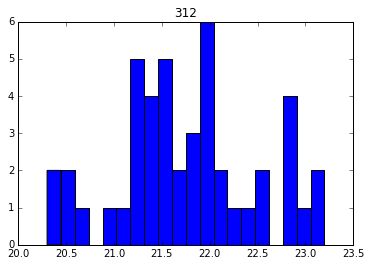

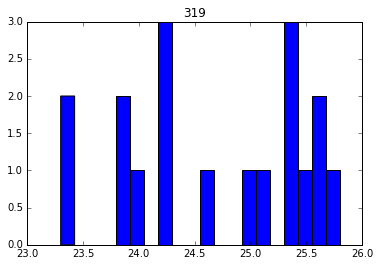

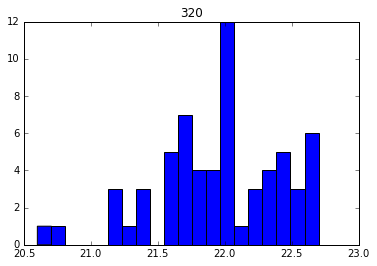

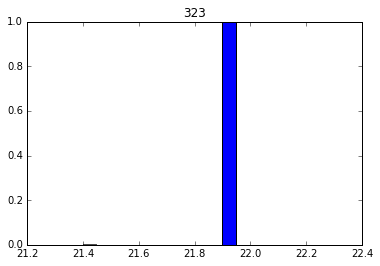

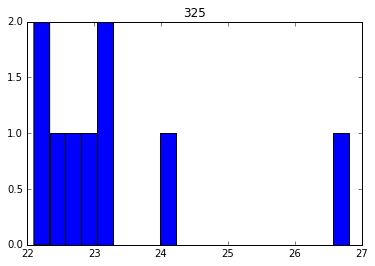

In [36]:
varietals = deliveries.groupby(['varietal'])
count = 0
for varietal, df in varietals:
    count += 1
    plt.hist(df['brix'], 20)
    plt.title(varietal)
    #plt.ylim(15, 36)
    plt.show()
    if count > 40:
        break

# Climate

In [37]:
climate.columns

Index(['pblk', 'day', 'ddays50', 'ddays50_97', 'ddays97', 'precip_intensity',
       'precip_intensity_adj', 'meantemp', 'mintemp', 'mintemp_time',
       'maxtemp', 'maxtemp_time', 'humidity', 'sunrise_time', 'sunrise_temp',
       'sunset_time', 'sunset_temp', 'dew_point', 'wind_speed', 'wind_bearing',
       'pressure', 'cloud_cover', 'lat', 'long', 'region',
       'region_consolidated'],
      dtype='object')

In [38]:
climate['day'] = pd.to_datetime(climate['day'])

In [39]:
climate['day'].unique().shape

(7678,)

This climate data contains records from 1995-01-01 to 2016-01-01 everyday. And roughly, every vineyard has all the records from all days.

In [40]:
climate['year'] = climate['day'].apply(lambda x: x.year).astype(int)
climate['month'] = climate['day'].apply(lambda x: x.month).astype(int)

In [41]:
group_vineyard = deliveries.groupby('pblk').size().sort_values(ascending=False)
top_vineyard = group_vineyard[:3].index.tolist()

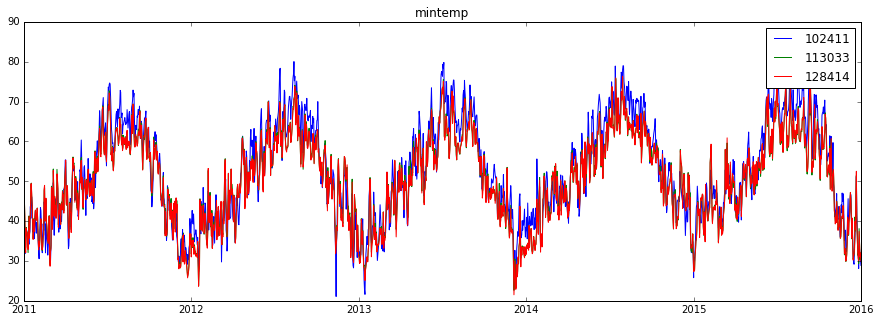

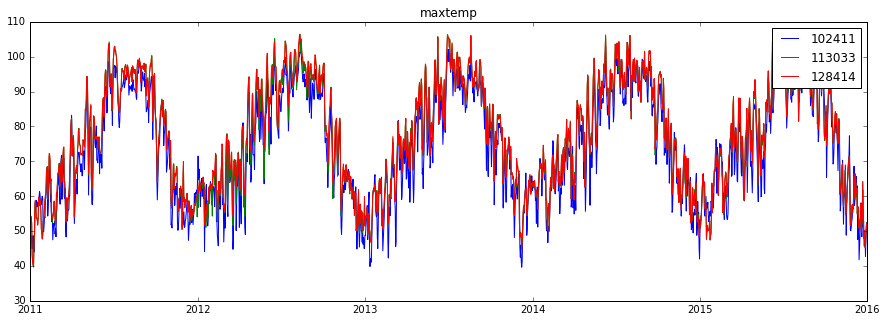

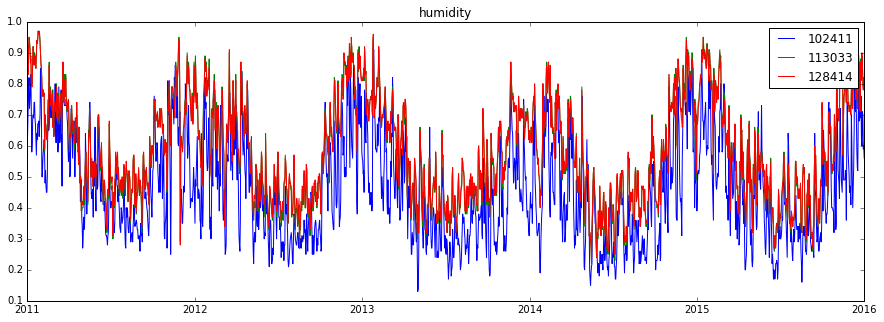

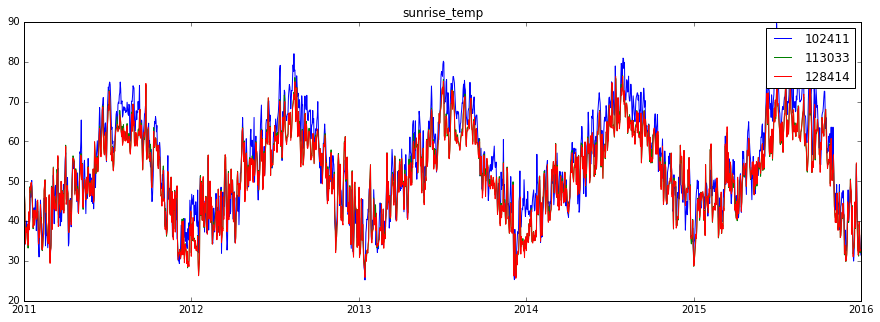

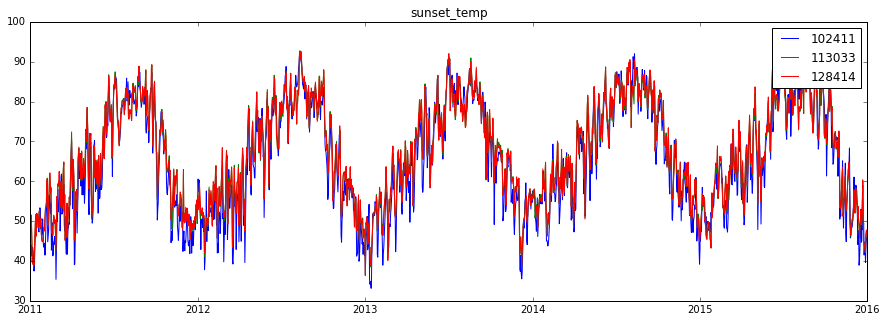

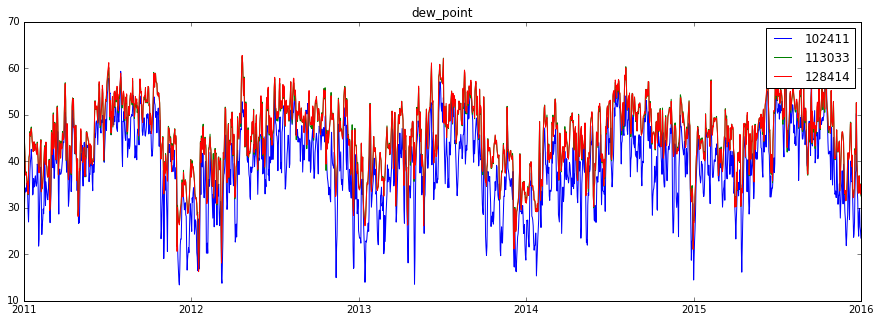

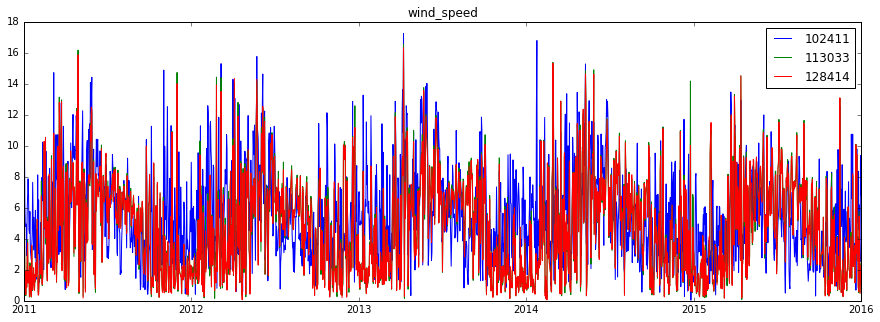

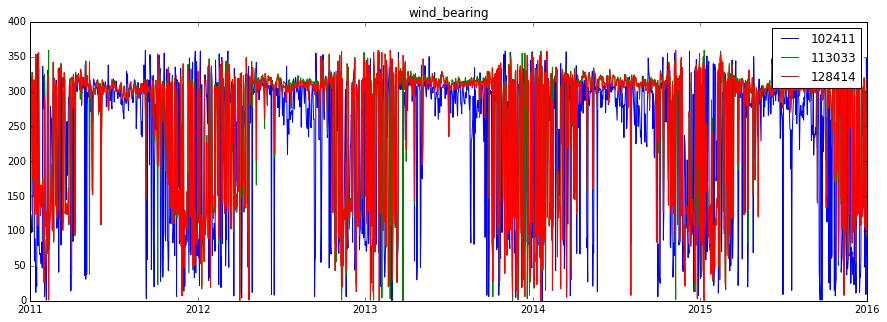

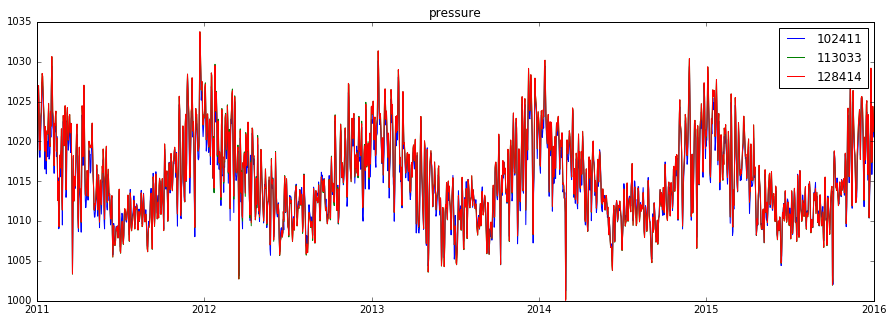

In [42]:
feature = ['mintemp', 'maxtemp', 'humidity', 'sunrise_temp', 'sunset_temp', 
           'dew_point', 'wind_speed', 'wind_bearing', 'pressure']

for item in feature:
    fig = plt.figure(figsize=(15,5))
    for vineyard in top_vineyard:
        sub = climate[(climate['pblk'] == int(vineyard)) & (climate['year'] > 2010)]
        sub = sub.sort_values('day')
        plt.plot(sub['day'], sub[item], label=vineyard)

    plt.title(item)
    plt.legend()
    plt.show()

count    7.673000e+03
mean    -8.325633e+03
std      1.726333e-09
min     -8.325633e+03
25%     -8.325633e+03
50%     -8.325633e+03
75%     -8.325633e+03
max     -8.325633e+03
Name: long, dtype: float64
count    7.673000e+03
mean    -8.421548e+03
std      6.366878e-10
min     -8.421548e+03
25%     -8.421548e+03
50%     -8.421548e+03
75%     -8.421548e+03
max     -8.421548e+03
Name: long, dtype: float64
count    7.673000e+03
mean    -8.408369e+03
std      1.249727e-09
min     -8.408369e+03
25%     -8.408369e+03
50%     -8.408369e+03
75%     -8.408369e+03
max     -8.408369e+03
Name: long, dtype: float64


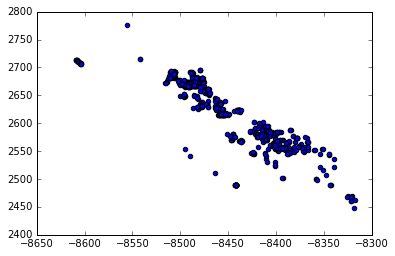

In [51]:
locations = climate.groupby('pblk')
vineyard_location = pd.DataFrame(columns=['vineyard', 'long', 'lat'])
i = 0
for location, df in locations:
    if location in top_vineyard:
        print(df['long'].describe())
    vineyard_location.loc[i] = [location, df['long'].min(), df['lat'].min()]
    i += 1

plt.scatter(vineyard_location['long'], vineyard_location['lat'])